# Analysis on Brazil Housing

**DataSet**: **Castro Brazila Inc.** a real estate management firm  in Brazil , anlysis to find the best cities to live for **Bachelors, mid-size families, and big families**

**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Uploading the Dataset**

In [2]:
brazil_df = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

In [3]:
brazil_df.head(15)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


**Details about the dataset**

In [4]:
brazil_df.shape

(10692, 13)

The dataset brazil contains 10692 rows and 13 columns.

In [5]:
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


Info on the each column and their datatype.

In [6]:
brazil_df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

The dataset Brazil_df does not contain any null values.

Dividing the Dataset into two columns **Categorial** and **Continous** values by creating the Datatype function.

In [3]:
def data_types(df):
    cat_var =[] # creating an empty list for categorial values
    con_var =[] # creating an empty list for continous values
    
    for col in df:
        if df[col].nunique()<50:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var    

In [4]:
# printing the categorial and continous values in a table
categorial_var, continous_var = data_types(brazil_df)
print(tabulate({"cat_var":categorial_var,"con_var":continous_var},headers=["Categorial Vari","Continous Vari"]))

Categorial Vari    Continous Vari
-----------------  -------------------
city               area
rooms              hoa (R$)
bathroom           rent amount (R$)
parking spaces     property tax (R$)
floor              fire insurance (R$)
animal             total (R$)
furniture


The above output shows that the total 13 columns have been divided based on the Categories and Numerical columns.

# Performing **Univariate Analysis** on Categorical Values

In [9]:
# creating a function for the categorial values and print unique, missing values if any and counting the values
def cat_info(col):
    print(f"Unique values in {col} : {brazil_df[col].unique()}")
    print(f"Missing Value counts of {col}: {brazil_df[col].isnull().sum()}")
    print(f"Mode of {col}: {brazil_df[col].mode()[0]}")
    value_counts=brazil_df[col].value_counts()
    print("value counts:", value_counts)

In [10]:
# creating a visualization function which helps to visual each categorial values with the help of bar and pie chart
def cat_visual(col):
    value_counts= brazil_df[col].value_counts()
    per= brazil_df[col].value_counts(normalize=True)*100 #value_counts in percentage
    plt.figure(figsize=(8,6))
    plt.bar(value_counts.index,value_counts.values)
    plt.title(f"value count of{col}")
        
    
    plt.figure(figsize=(8,6))
    plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
    plt.title(f"percentage of {col}")

Unique values in city : ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Missing Value counts of city: 0
Mode of city: São Paulo
value counts: São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


Unique values in rooms : [ 2  4  1  3  7  5  8  6 10 13  9]
Missing Value counts of rooms: 0
Mode of rooms: 3
value counts: 3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64


Unique values in bathroom : [ 1  4  3  2  6  5  7  9  8 10]
Missing Value counts of bathroom: 0
Mode of bathroom: 1
value counts: 1     4301
2     2910
3     1474
4     1111
5      578
6      215
7       85
8       11
9        4
10       3
Name: bathroom, dtype: int64


Unique values in parking spaces : [ 1  0  7  4  2  6  3  8  5 10 12]
Missing Value counts of parking spaces: 0
Mode of parking spaces: 1
value cou

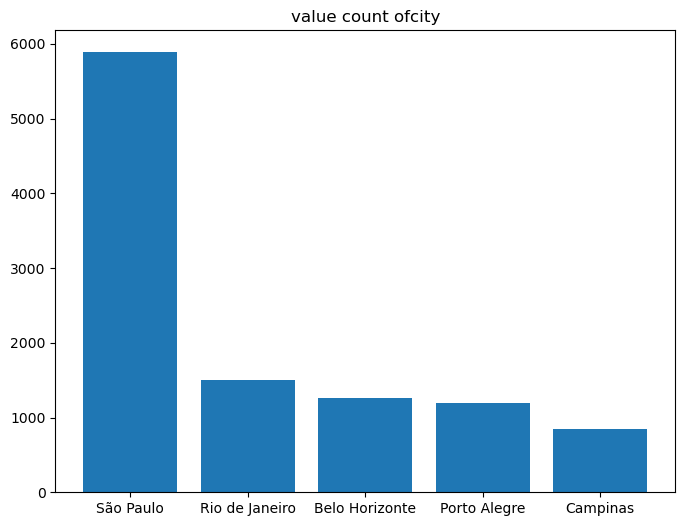

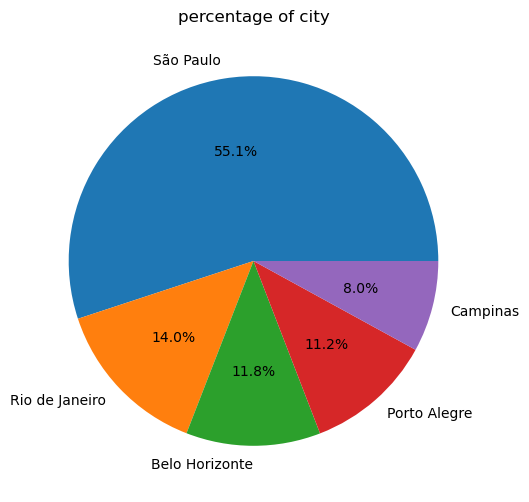

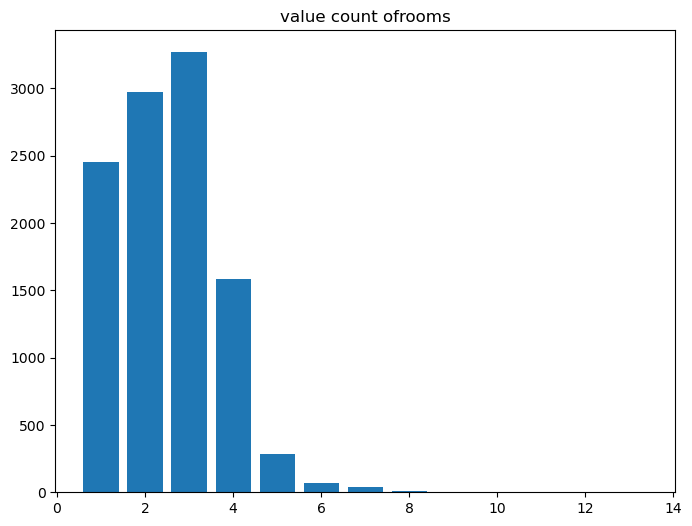

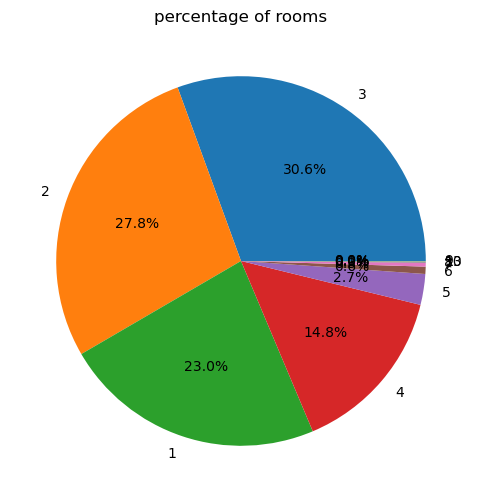

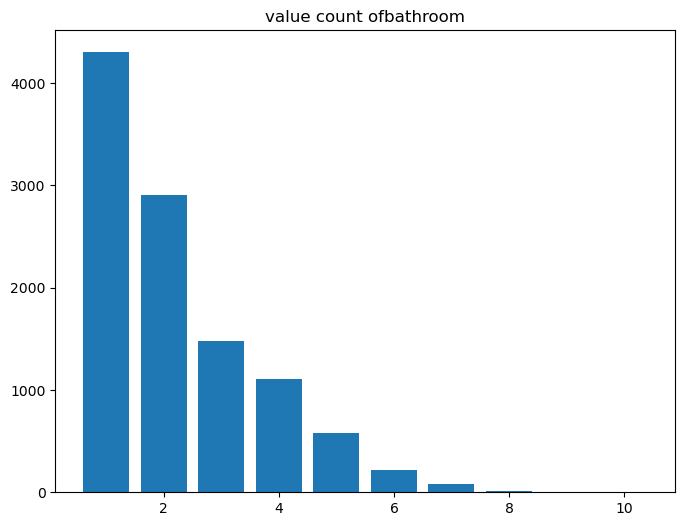

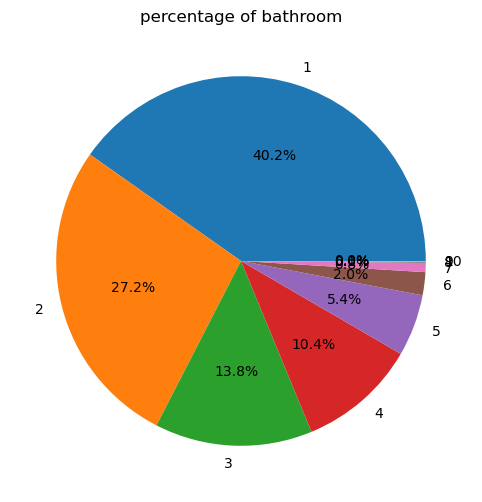

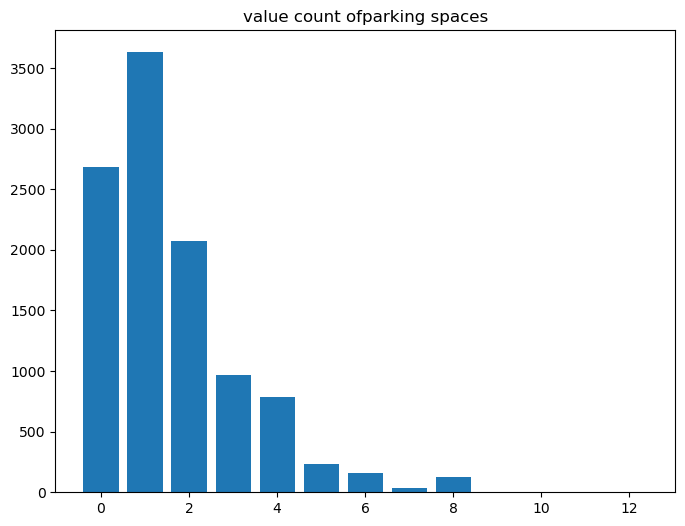

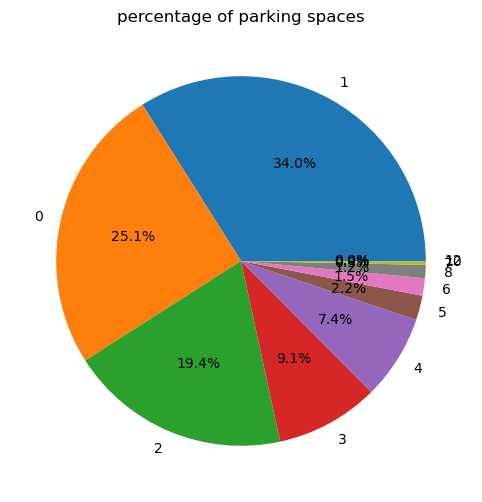

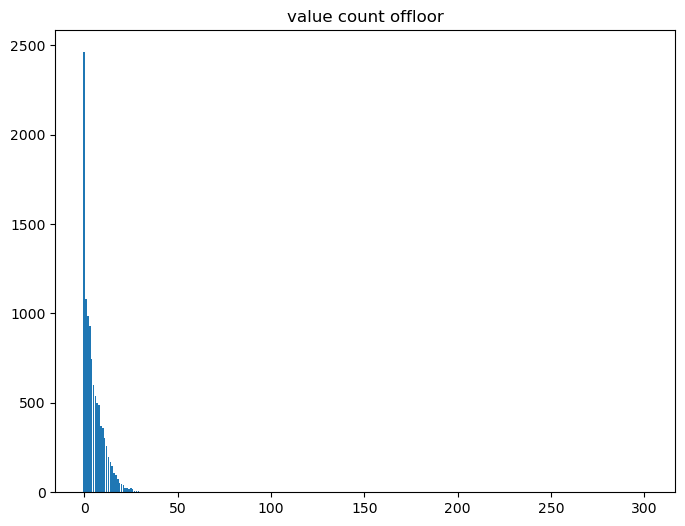

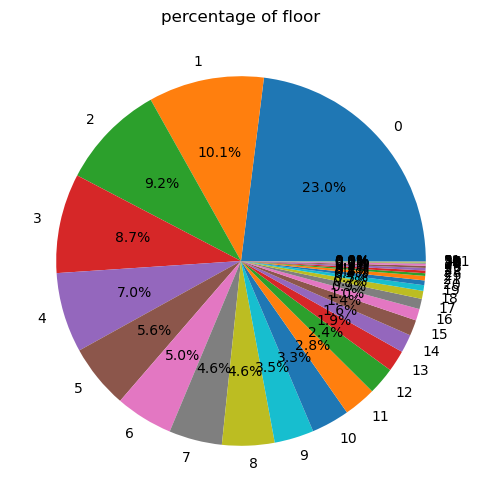

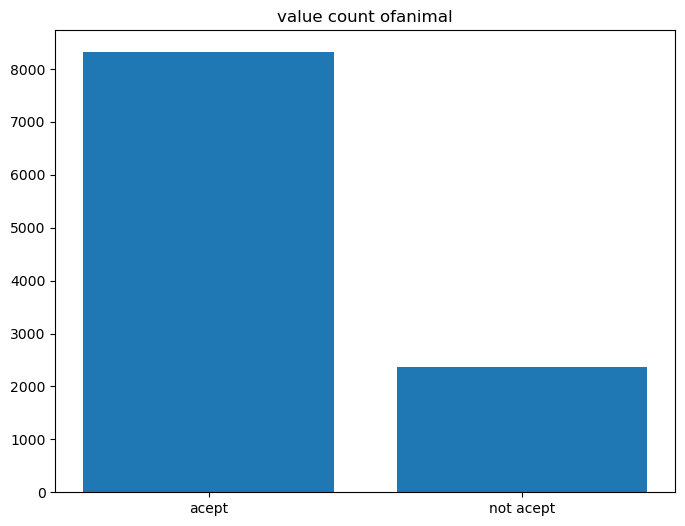

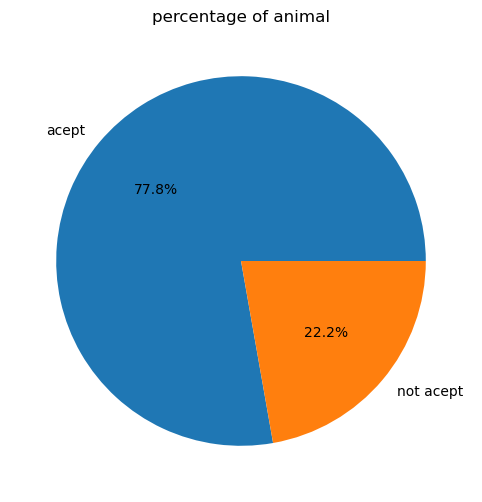

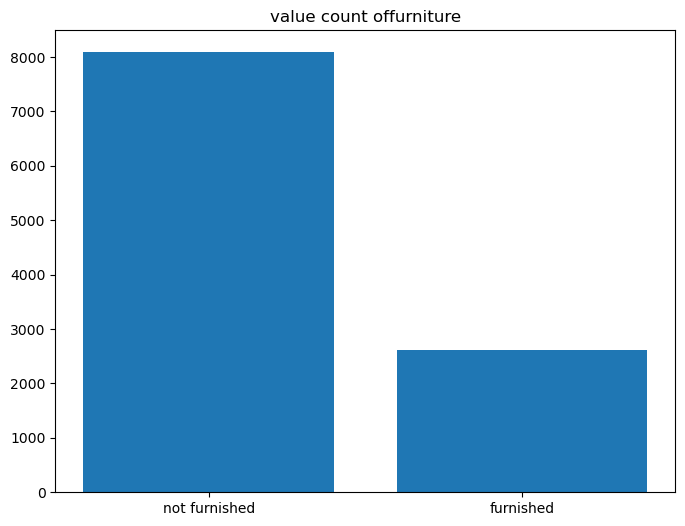

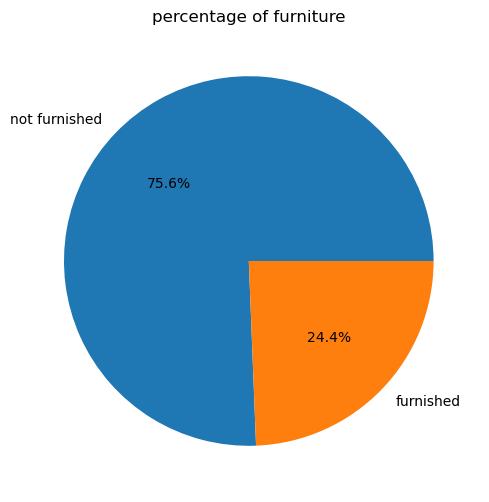

In [11]:
# printing the columns and visualizing them one by one
for col in categorial_var:
    cat_info(col)
    cat_visual(col)
    print("\n")

The above graphs tells us about the maximum count of values of each categorical columns for .eg.  
**Sao Paulo** city has the maximum count among the 5 cities.  
**3 roomns** count is the highest.  
**Bathroom count 1** is the highest.  
Those who have **no parking space and with 1 parking space** is the highest.  





In [12]:
# to treate the ouliers in the floor column , we are replacing the values of 301,

In [13]:
brazil_df.floor.replace(301,51,inplace=True)

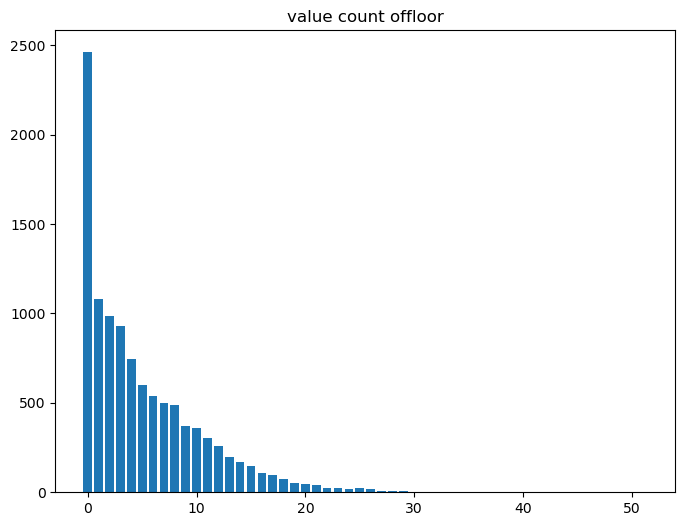

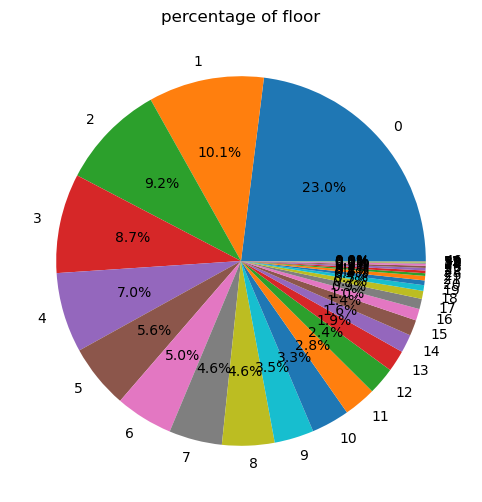

In [14]:
cat_visual('floor')

In [15]:
brazil_df['parking spaces'].fillna(brazil_df["parking spaces"].mode()[0],inplace=True)

# Numerical

In [16]:
def num_info(col):
    summary=brazil_df[col].describe()
    print(summary)
    print(f"median of {col}: {brazil_df[col].median()}")
    print(f"mode of {col}: {brazil_df[col].mode()[0]}")
    print(f"missing values {col}: {brazil_df[col].isnull().sum()}")
    print(f"skewness of {col}:{brazil_df[col].skew()}")
    print(f"Kurtosis of {col}: {brazil_df[col].kurt()}")

In [17]:
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(brazil_df[col])
    sns.boxplot(y=brazil_df[col],ax=ax[1])

**1. Area**

In [18]:
num_info('area')

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64
median of area: 90.0
mode of area: 50
missing values area: 0
skewness of area:69.5968036883111
Kurtosis of area: 5548.308333555553


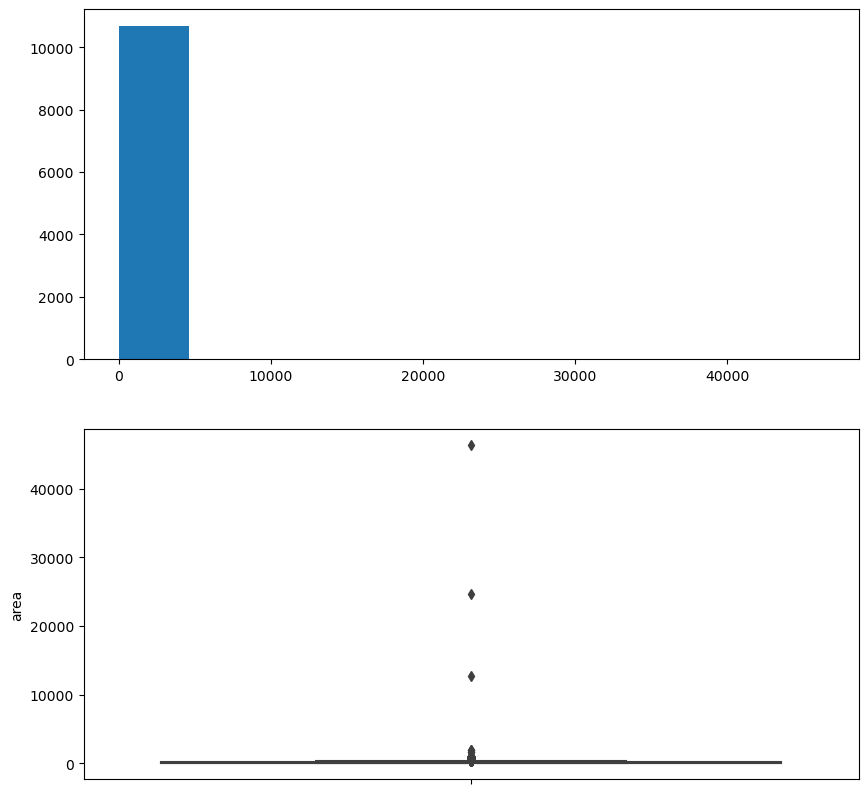

In [19]:
num_visual('area')

**Outliers Detected**

In [20]:
q1 = brazil_df["area"].quantile(.25)
q3 = brazil_df["area"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["area"]>uf,"area"]=brazil_df["area"].median()
brazil_df.loc[brazil_df["area"]<lf,"area"]=brazil_df["area"].median()

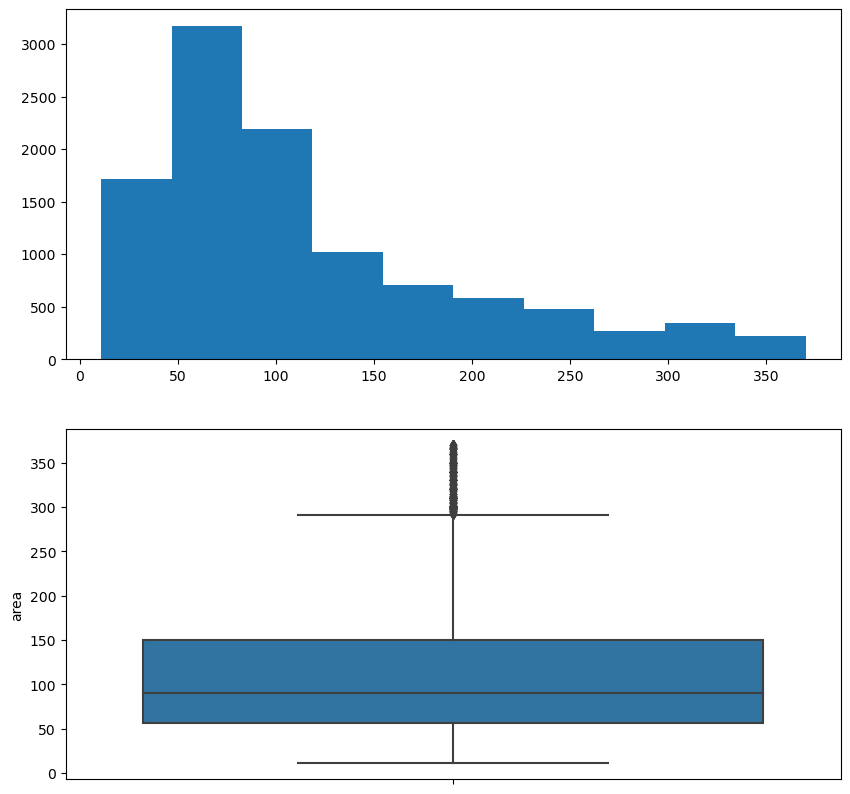

In [21]:
num_visual('area')

Outliers treated for Area column using Median.

**2.hoa (R$)**

In [22]:
num_info("hoa (R$)")

count    1.069200e+04
mean     1.174022e+03
std      1.559231e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.237500e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64
median of hoa (R$): 560.0
mode of hoa (R$): 0
missing values hoa (R$): 0
skewness of hoa (R$):69.03938118910439
Kurtosis of hoa (R$): 4912.249105821746


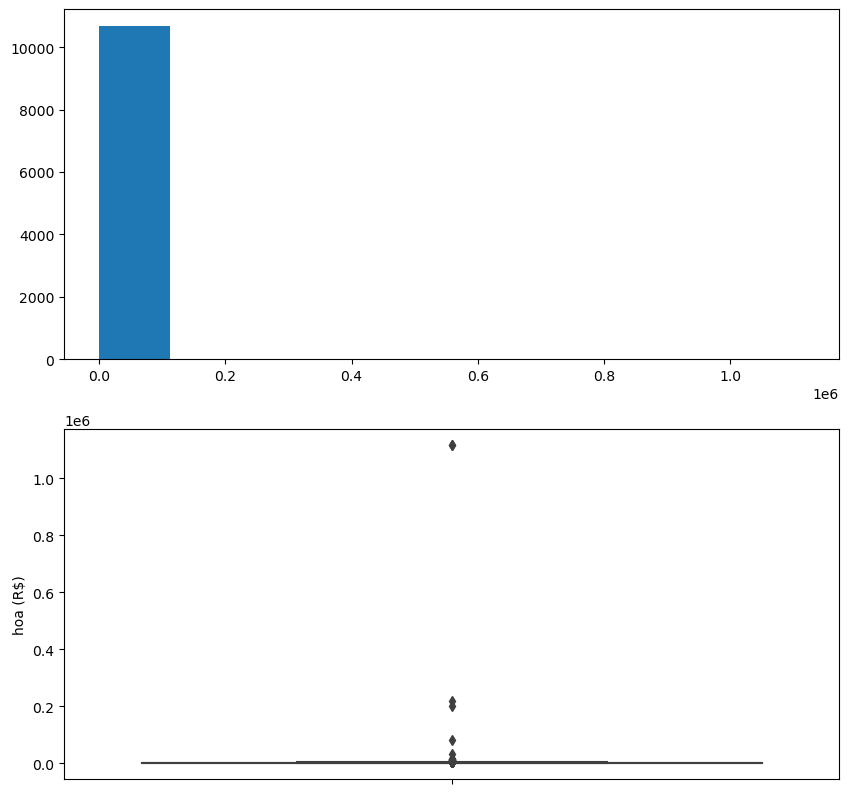

In [23]:
num_visual('hoa (R$)')

Outliers Detected

In [24]:
brazil_df['hoa (R$)'].value_counts()

0       2373
400      177
300      168
500      164
600      141
        ... 
3950       1
4976       1
5281       1
855        1
3519       1
Name: hoa (R$), Length: 1679, dtype: int64

In [25]:
q1 = brazil_df["hoa (R$)"].quantile(.25)
q3 = brazil_df["hoa (R$)"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["hoa (R$)"]>uf,"hoa (R$)"]=brazil_df["hoa (R$)"].median()
brazil_df.loc[brazil_df["hoa (R$)"]<lf,"hoa (R$)"]=brazil_df["hoa (R$)"].median()

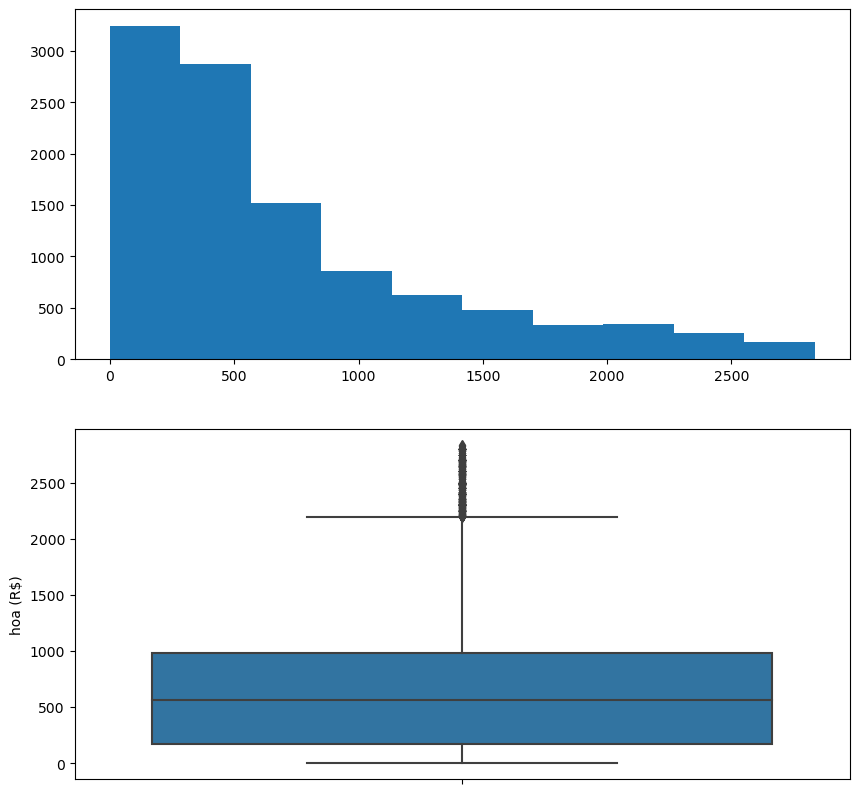

In [26]:
num_visual('hoa (R$)')

Outliers treated for Hoa (Rs) column using Mean.

**3.rent amount (R$)**

In [27]:
num_info('rent amount (R$)')

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64
median of rent amount (R$): 2661.0
mode of rent amount (R$): 2500
missing values rent amount (R$): 0
skewness of rent amount (R$):1.8388773035440982
Kurtosis of rent amount (R$): 4.624228179818687


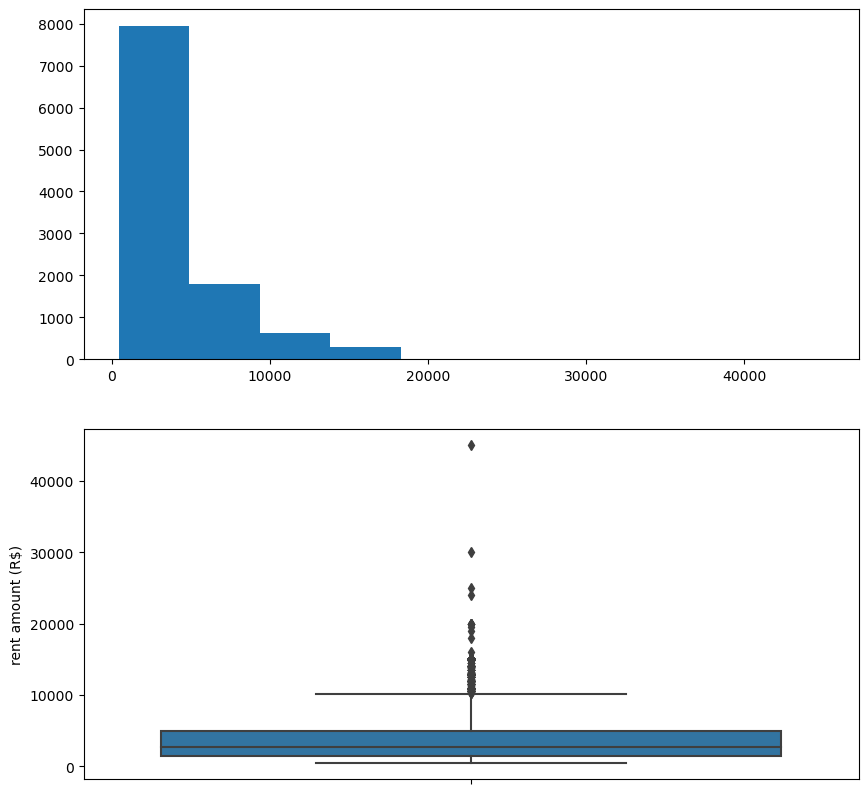

In [28]:
num_visual('rent amount (R$)')

Outliers Detected.

In [29]:
brazil_df['rent amount (R$)'].value_counts()

2500     258
2000     244
1200     237
3000     235
15000    231
        ... 
874        1
1283       1
765        1
5990       1
1478       1
Name: rent amount (R$), Length: 1195, dtype: int64

In [30]:
q1 = brazil_df["rent amount (R$)"].quantile(.25)
q3 = brazil_df["rent amount (R$)"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["rent amount (R$)"]>uf,"rent amount (R$)"]=brazil_df["rent amount (R$)"].median()
brazil_df.loc[brazil_df["rent amount (R$)"]<lf,"rent amount (R$)"]=brazil_df["rent amount (R$)"].median()

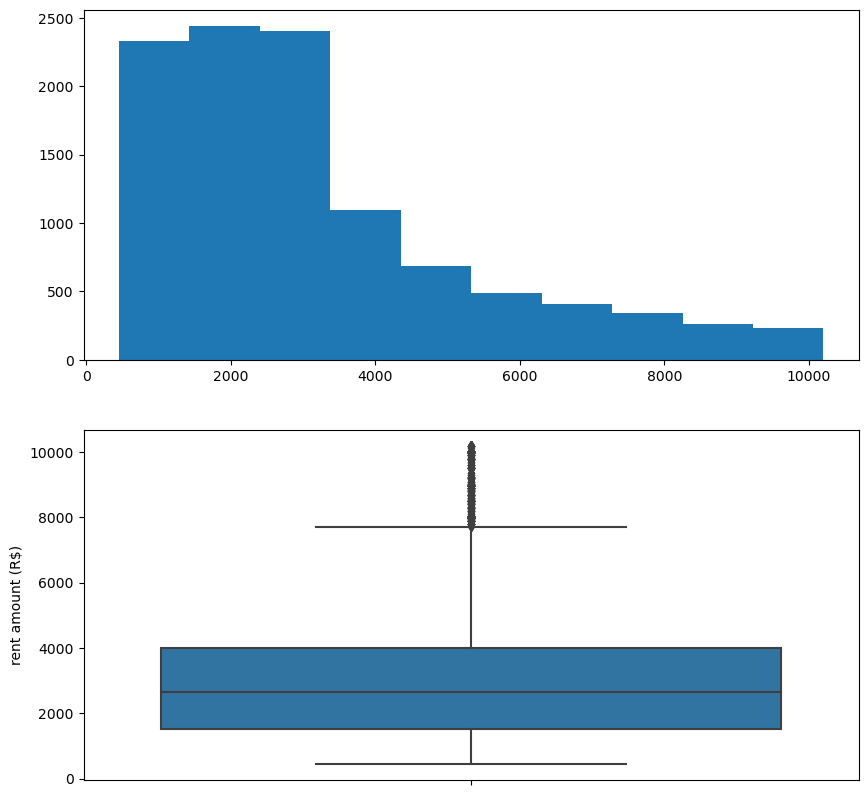

In [31]:
num_visual('rent amount (R$)')

In [32]:
num_info('rent amount (R$)')

count    10692.000000
mean      3183.769173
std       2222.330487
min        450.000000
25%       1530.000000
50%       2660.500000
75%       4000.000000
max      10200.000000
Name: rent amount (R$), dtype: float64
median of rent amount (R$): 2660.5
mode of rent amount (R$): 2661.0
missing values rent amount (R$): 0
skewness of rent amount (R$):1.3069307486179944
Kurtosis of rent amount (R$): 1.0616778980833046


**4.property tax (R$)**

In [33]:
num_info('property tax (R$)')

count     10692.000000
mean        366.704358
std        3107.832321
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: property tax (R$), dtype: float64
median of property tax (R$): 125.0
mode of property tax (R$): 0
missing values property tax (R$): 0
skewness of property tax (R$):96.01359410694417
Kurtosis of property tax (R$): 9667.782564042263


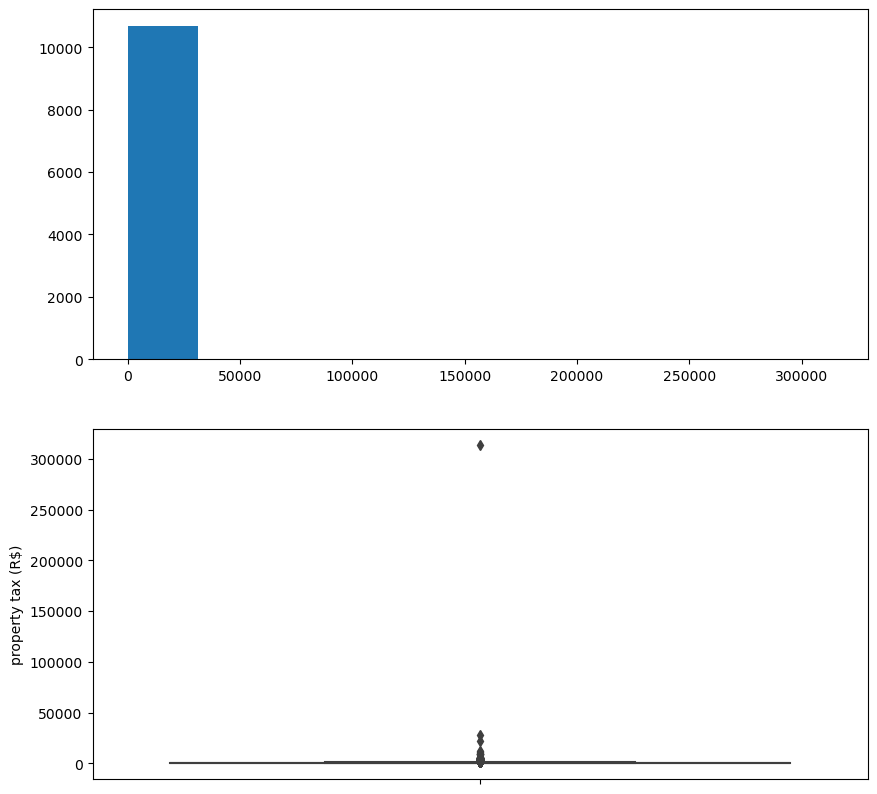

In [34]:
num_visual('property tax (R$)')

outliers Detected

In [35]:
q1 = brazil_df["property tax (R$)"].quantile(.25)
q3 = brazil_df["property tax (R$)"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["property tax (R$)"]>uf,"property tax (R$)"]=brazil_df["property tax (R$)"].median()
brazil_df.loc[brazil_df["property tax (R$)"]<lf,"property tax (R$)"]=brazil_df["property tax (R$)"].median()

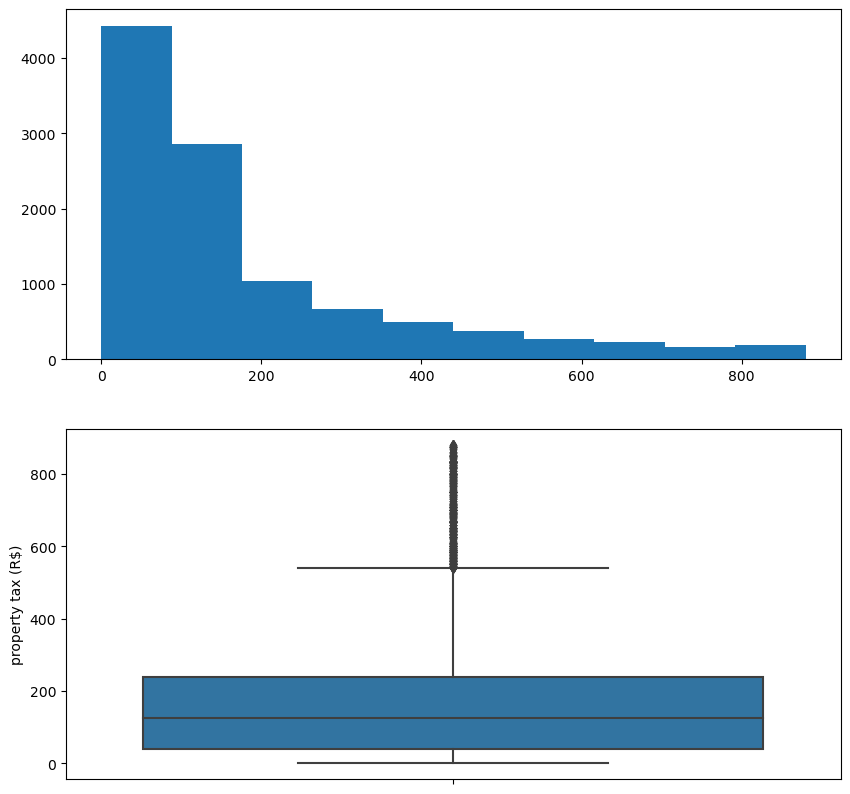

In [36]:
num_visual('property tax (R$)')

**5. fire insurance (R$)**

In [37]:
num_info('fire insurance (R$)')

count    10692.000000
mean        53.300879
std         47.768031
min          3.000000
25%         21.000000
50%         36.000000
75%         68.000000
max        677.000000
Name: fire insurance (R$), dtype: float64
median of fire insurance (R$): 36.0
mode of fire insurance (R$): 16
missing values fire insurance (R$): 0
skewness of fire insurance (R$):1.9703997562081081
Kurtosis of fire insurance (R$): 5.934963027008838


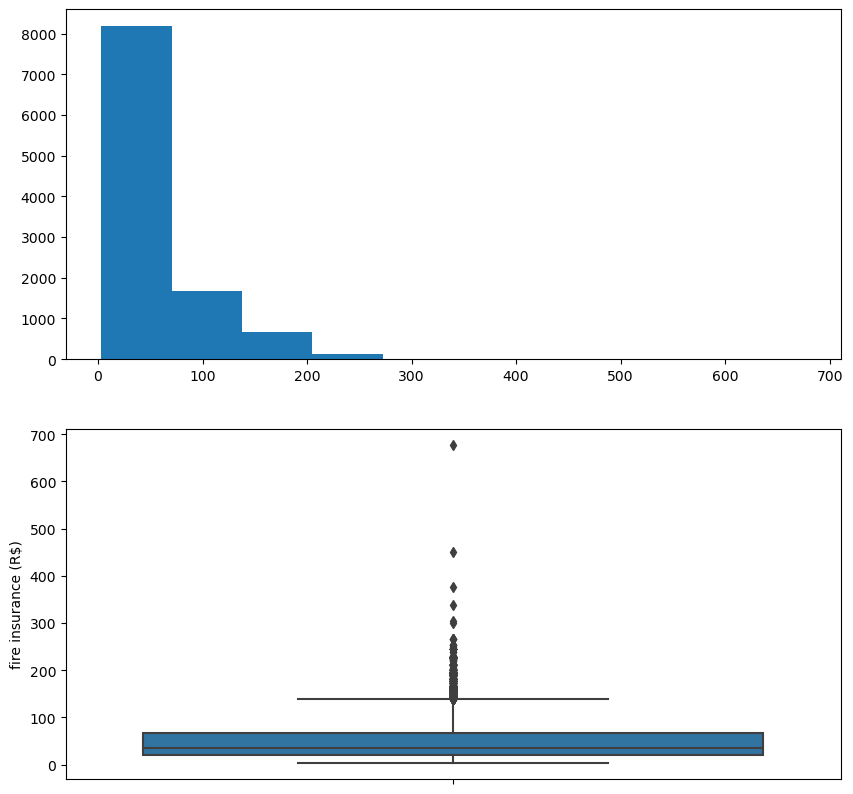

In [38]:
num_visual('fire insurance (R$)')

Outliers Detected.

In [39]:
q1 = brazil_df["fire insurance (R$)"].quantile(.25)
q3 = brazil_df["fire insurance (R$)"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["fire insurance (R$)"]>uf,"fire insurance (R$)"]=brazil_df["fire insurance (R$)"].median()
brazil_df.loc[brazil_df["fire insurance (R$)"]<lf,"fire insurance (R$)"]=brazil_df["fire insurance (R$)"].median()

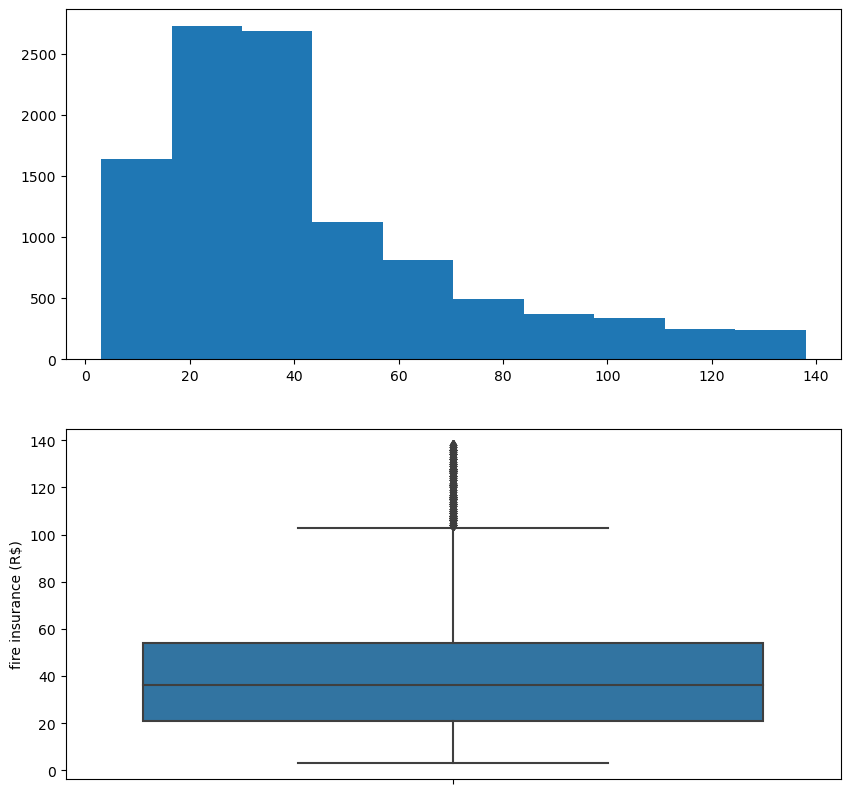

In [40]:
num_visual('fire insurance (R$)')

**6.total (R$)**

In [41]:
num_info('total (R$)')

count    1.069200e+04
mean     5.490487e+03
std      1.648473e+04
min      4.990000e+02
25%      2.061750e+03
50%      3.581500e+03
75%      6.768000e+03
max      1.120000e+06
Name: total (R$), dtype: float64
median of total (R$): 3581.5
mode of total (R$): 2555
missing values total (R$): 0
skewness of total (R$):58.96080291866255
Kurtosis of total (R$): 3926.0193052130835


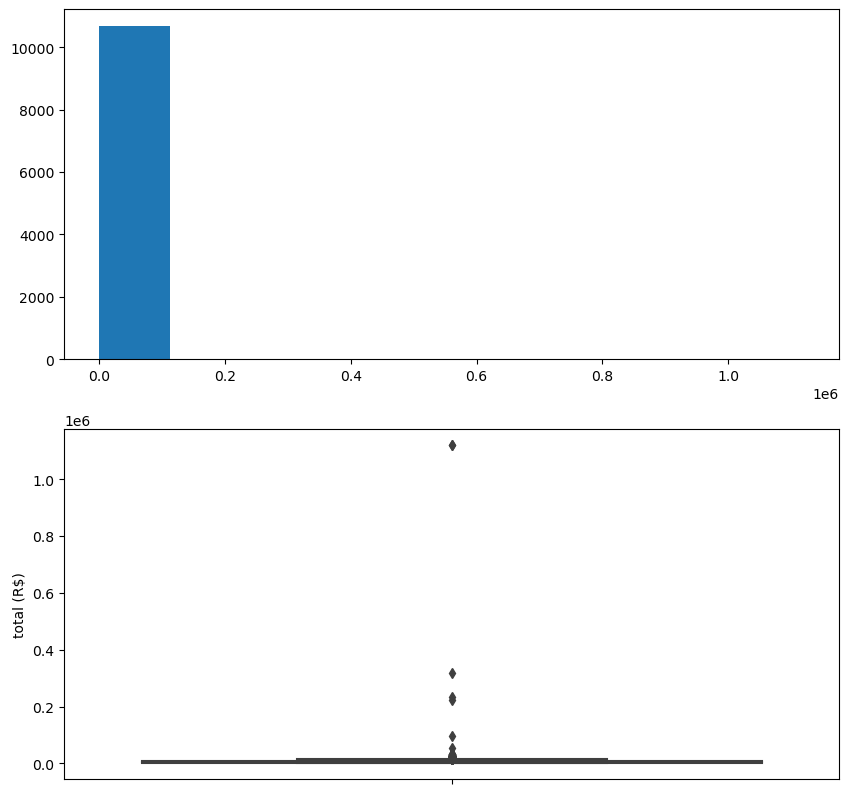

In [42]:
num_visual('total (R$)')

outliers detected

In [43]:
q1 = brazil_df["total (R$)"].quantile(.25)
q3 = brazil_df["total (R$)"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
brazil_df.loc[brazil_df["total (R$)"]>uf,"total (R$)"]=brazil_df["total (R$)"].median()
brazil_df.loc[brazil_df["total (R$)"]<lf,"total (R$)"]=brazil_df["total (R$)"].median()

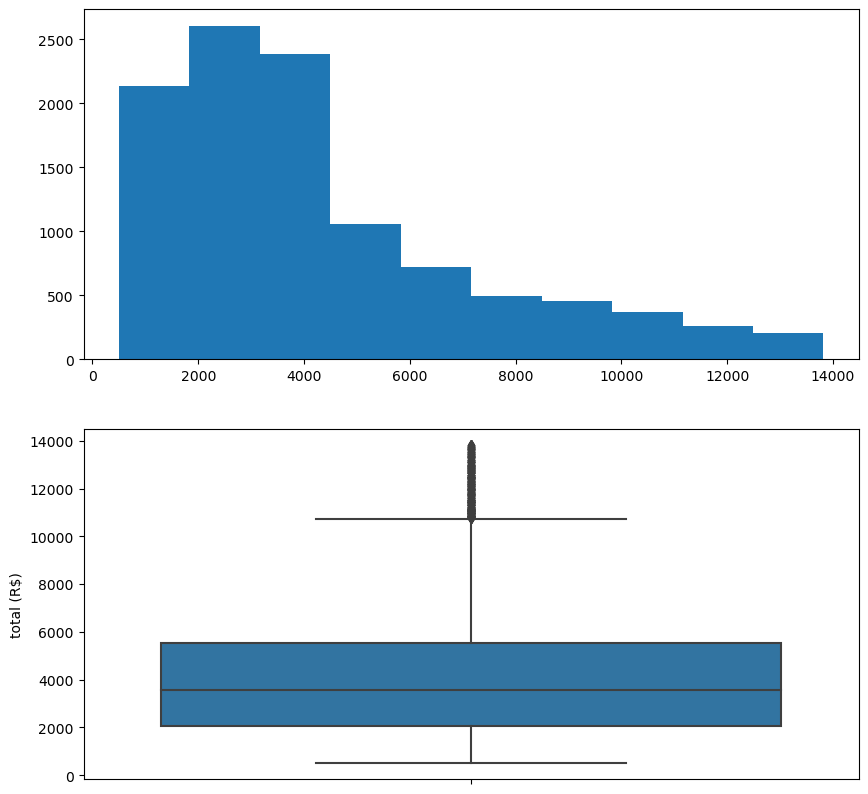

In [44]:
num_visual('total (R$)')

# Bivariate

**Categorical VS Categorical**

To find the best city to live , we campare the City column with every column in the Category.

1.Rooms

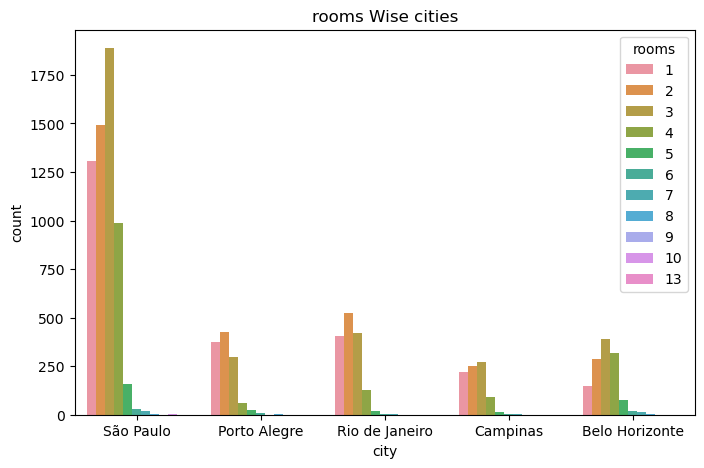

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',hue='rooms',data=brazil_df)
plt.title("rooms Wise cities")
plt.show()

We can see from the above graph that city **Sao Paulo,Rio de Janeiro** provide max. rooms.

2.parking spaces

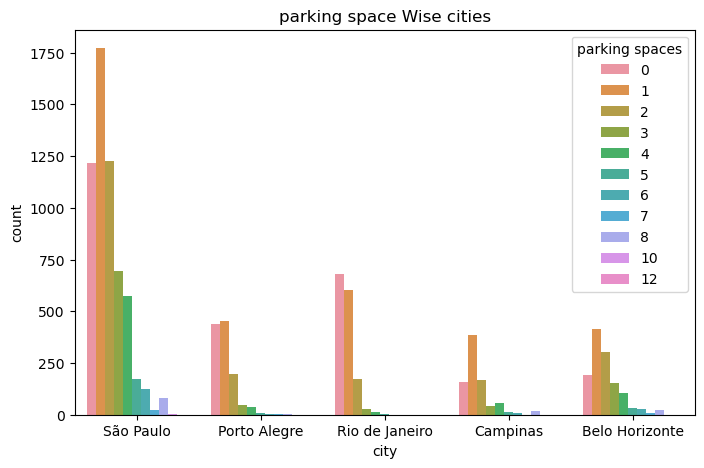

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',hue='parking spaces',data=brazil_df)
plt.title("parking space Wise cities")
plt.show()

Cities like **Sao Paulo, Rio de Janeiro and Porto Alegre** provides maximum no. of Parking Spaces.

3. Bathrooms

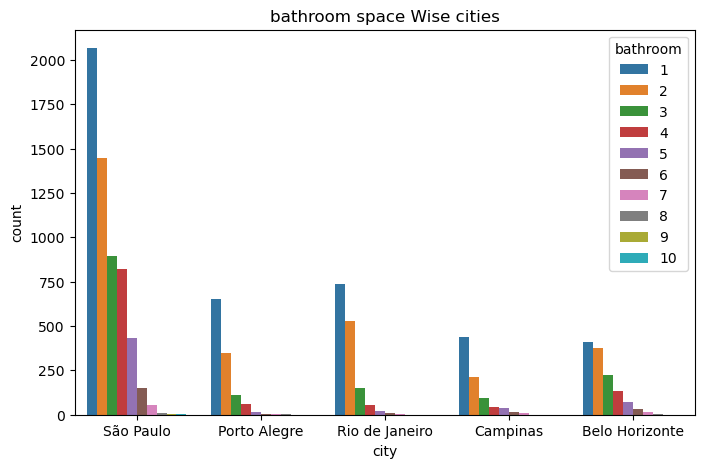

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',hue='bathroom',data=brazil_df)
plt.title("bathroom space Wise cities")
plt.show()

City **Sao Paulo, Porto Alegre and Rio de Janeiro** have provide 1 or 2 bathrooms but city **Belo Horizonte** has the maximum no. of bathrooms. 

4. Animal

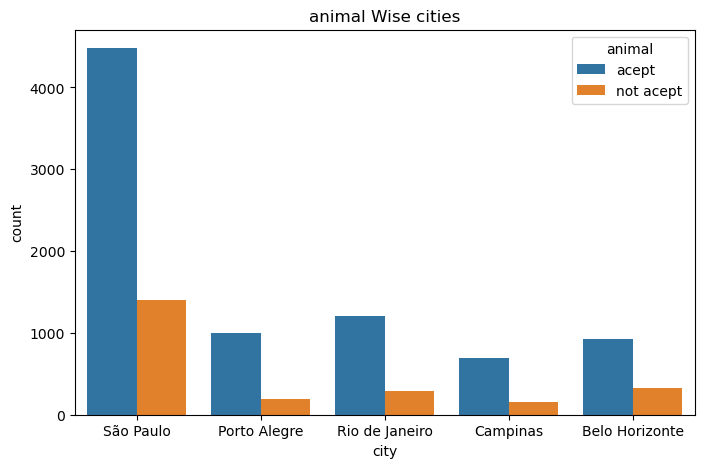

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',hue='animal',data=brazil_df)
plt.title("animal Wise cities")
plt.show()

From the above graph we can see that cities like **Sao Paulo** accepts maximum no. of  pets.

5. furniture

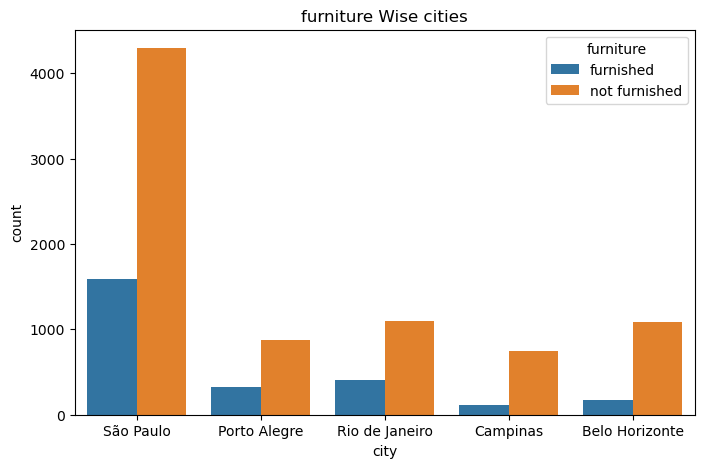

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='city',hue='furniture',data=brazil_df)
plt.title("furniture Wise cities")
plt.show()

City **Sao Paulo** provides maximum no. of unfurnished furnitures, it also has the maximum no. of furnished furnitures.

# Categorial VS Numerical

**1. City on Area**

<AxesSubplot:xlabel='city', ylabel='area'>

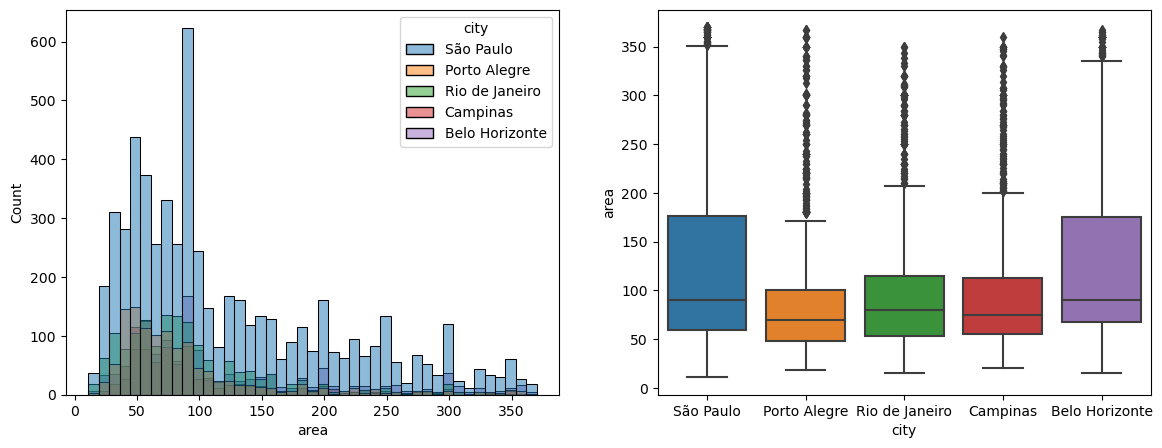

In [50]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =brazil_df['area'], hue=brazil_df['city'],ax=ax[0])
sns.boxplot(y =brazil_df['area'], x=brazil_df['city'],ax=ax[1])

From the above charts we can see that the cities **Sao Paulo and Belo Horizonte** provide more area in sq. meters to live.

**2. City VS rent amount (R$)**

<AxesSubplot:xlabel='city', ylabel='rent amount (R$)'>

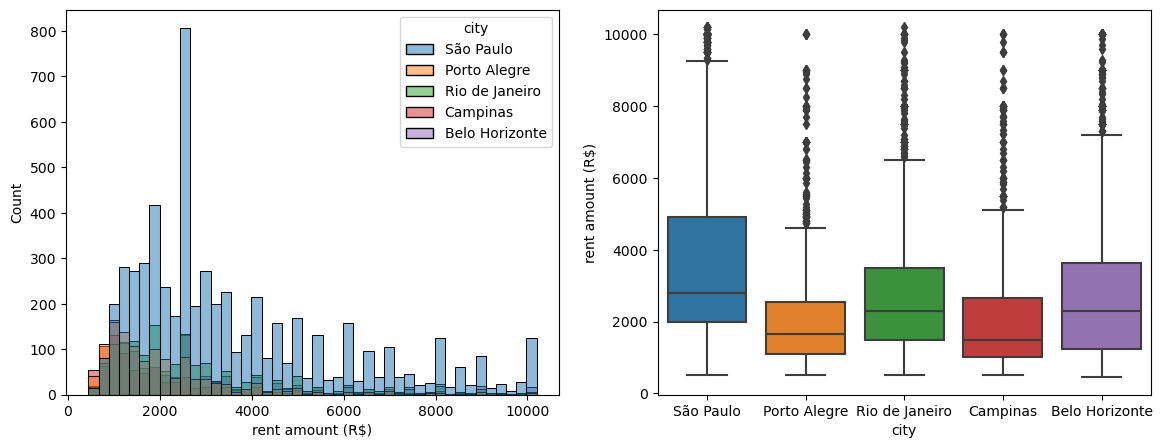

In [51]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =brazil_df['rent amount (R$)'], hue=brazil_df['city'],ax=ax[0])
sns.boxplot(y =brazil_df['rent amount (R$)'], x=brazil_df['city'],ax=ax[1])

From the above chart we can see that cities **Porto Alegre and Campinas** have the low rent amount.

**3. City VS total (R$)**

<AxesSubplot:xlabel='city', ylabel='total (R$)'>

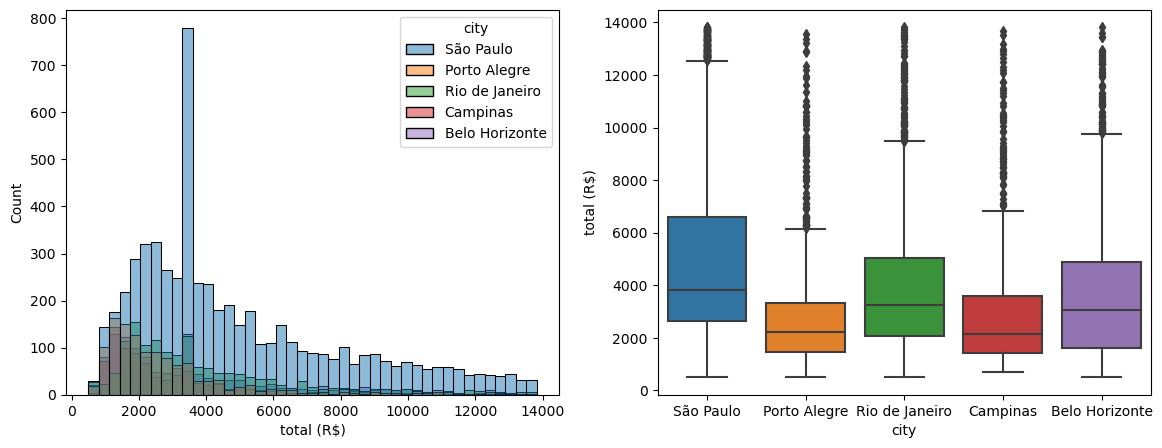

In [52]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =brazil_df['total (R$)'], hue=brazil_df['city'],ax=ax[0])
sns.boxplot(y =brazil_df['total (R$)'], x=brazil_df['city'],ax=ax[1])

In the above chart we can see that for cities like **Porto Alegre** and **Campinas** provide low total of the rent amount , property tax and fire insurance.

**4. City VS hoa (R$)**

<AxesSubplot:xlabel='city', ylabel='hoa (R$)'>

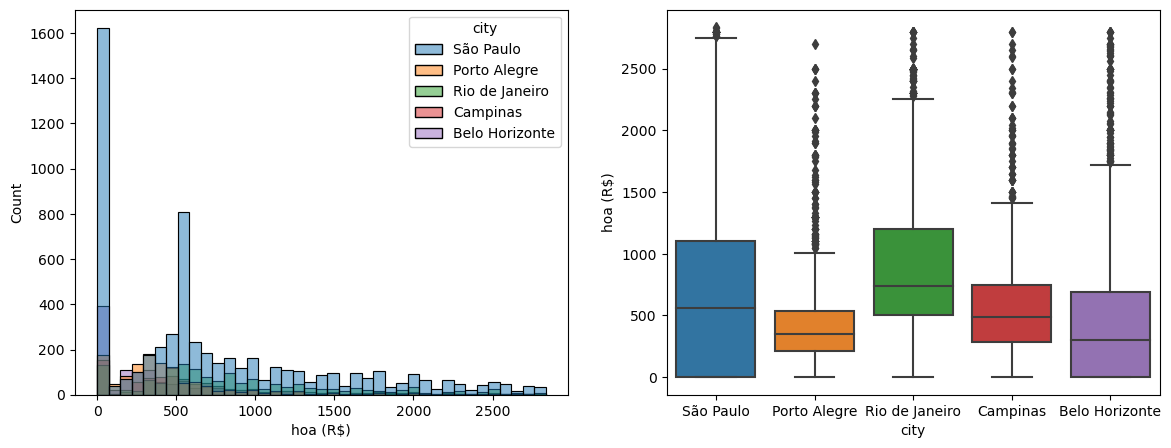

In [53]:
fig, ax= plt.subplots(1,2, figsize=(14,5))
sns.histplot(x =brazil_df['hoa (R$)'], hue=brazil_df['city'],ax=ax[0])
sns.boxplot(y =brazil_df['hoa (R$)'], x=brazil_df['city'],ax=ax[1])

From the above graph we found that Cities like **Sao Paulo** and **Belo Horizonte** provides low Homeowner association tax , while city **Rio de Janerio** has high homeowner assiciation tax.

# Multivariate

In [54]:
brazil_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300.0,211,42,5618.0
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960.0,125,63,7973.0
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800.0,0,41,3841.0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112.0,22,17,1421.0
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800.0,25,11,836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478.0,24,22,1926.0
10688,São Paulo,285,4,4,4,17,acept,not furnished,560,2661.0,125,36,3581.5
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000.0,332,78,7390.0
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,2661.0,279,36,3581.5


# Analysis on Suitable City for a Bachelor

**conditon1 for bachelor:  bath 1 ,room is 1, parking is atleast  1**

In [55]:
brazil_df['rent amount (R$)'].value_counts()

2661.0    715
2500.0    258
2000.0    244
1200.0    237
3000.0    235
         ... 
609.0       1
2953.0      1
5860.0      1
928.0       1
1478.0      1
Name: rent amount (R$), Length: 1127, dtype: int64

In [56]:
brazil_df['rent amount (R$)'].min()

450.0

In [57]:
cond1b = brazil_df[(brazil_df['rooms']==1)&(brazil_df['bathroom']==1)&(brazil_df['parking spaces']==1)]

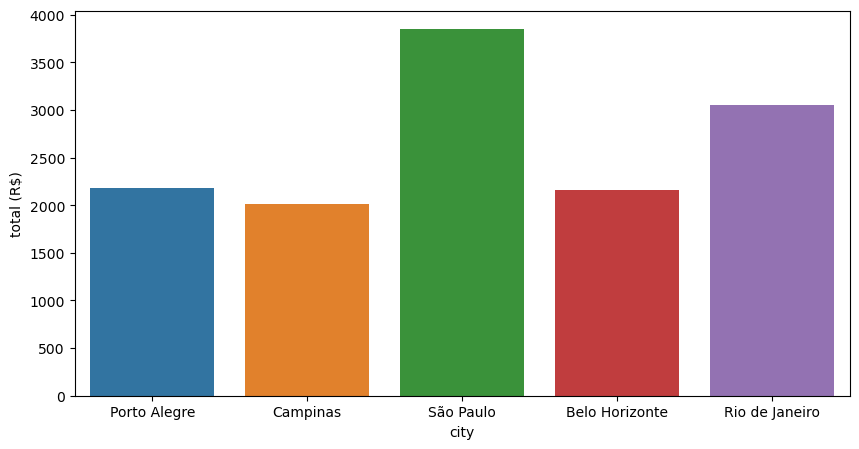

In [58]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond1b,ci=None)
plt.show()

From the above analysis we found that Bachelors in majority can live in City **Campinas** and **Belo Horizonte** and **Porto Alegre**.

**Condition 2: 1 room,1 bathroom, atleast 1 parking space , with pets and funiture is furnished** 

In [59]:
brazil_df['area'].value_counts()

90     881
50     334
70     329
60     297
80     253
      ... 
307      1
11       1
342      1
356      1
228      1
Name: area, Length: 347, dtype: int64

In [77]:
cond2b = brazil_df[(brazil_df['rooms']==1)&(brazil_df['bathroom']==1)&(brazil_df['parking spaces']==1)&(brazil_df['furniture']=='furnished')&(brazil_df['animal']=='acept')]

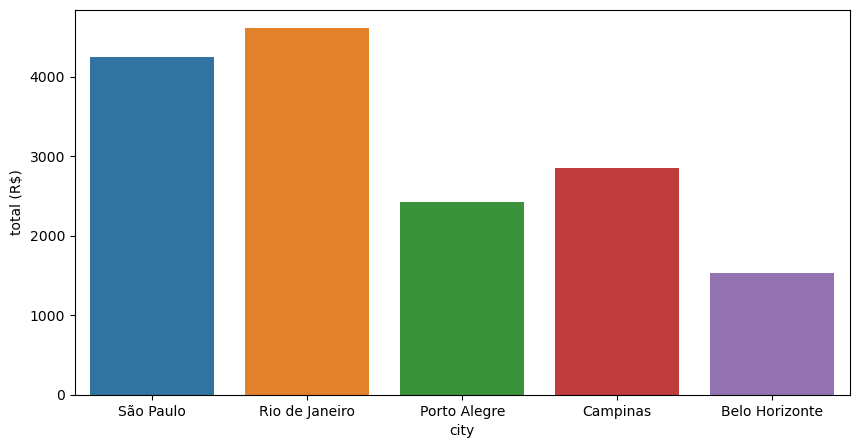

In [78]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond2b,ci=None)
plt.show()

From the above analysis we can see that by including more conditions in the above variable we found out that for a bachelor moving to city **Belo Horizonte** with better living under cheap price.

# Analysis on suitable City for mid - size Families.

In [62]:
brazil_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300.0,211,42,5618.0
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960.0,125,63,7973.0
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800.0,0,41,3841.0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112.0,22,17,1421.0
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800.0,25,11,836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478.0,24,22,1926.0
10688,São Paulo,285,4,4,4,17,acept,not furnished,560,2661.0,125,36,3581.5
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000.0,332,78,7390.0
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,2661.0,279,36,3581.5


In [63]:
brazil_df["rooms"].value_counts()

3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

In [64]:
brazil_df['fire insurance (R$)'].value_counts()

36     958
16     300
20     291
26     270
22     256
      ... 
118      4
133      4
105      4
4        2
3        2
Name: fire insurance (R$), Length: 136, dtype: int64

In [65]:
brazil_df['total (R$)'].value_counts()

3581.5    706
2555.0     39
2633.0     25
4089.0     21
1219.0     15
         ... 
9922.0      1
4920.0      1
2915.0      1
1148.0      1
4695.0      1
Name: total (R$), Length: 5292, dtype: int64

**Condition1: pets, bathroom more than 2, parking space atleast 2, furnished,rooms atleast 3**.

In [79]:
cond1m = brazil_df[(brazil_df['animal']=='acept')&(brazil_df['bathroom']>=2)&(brazil_df['parking spaces']>=2)&(brazil_df['furniture']=='furnished')&(brazil_df['rooms']==3)]

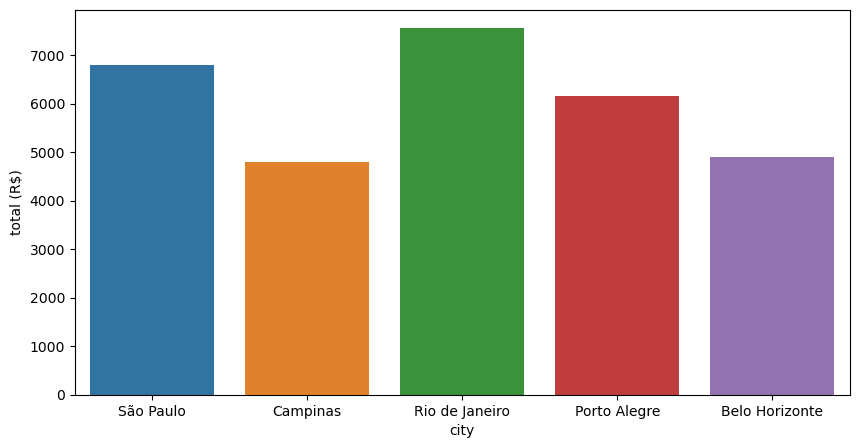

In [80]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond1m,ci=None)
plt.show()

From the above chart we can see that after the analysis the cities suited for mid size family with the condition is city **Campinas** .

**Condition 2: no pets, unfurnished,parking 2 , bathroom altleast 3**.

In [81]:
cond2m = brazil_df[(brazil_df['animal']=='not acept')&(brazil_df['bathroom']==3)&(brazil_df['parking spaces']==2)&(brazil_df['furniture']=='not furnished')]

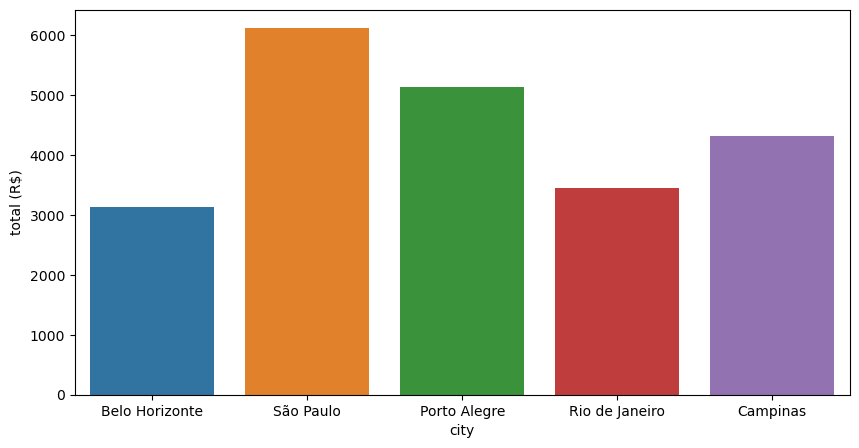

In [82]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond2m,ci=None)
plt.show()

From the chart with the conditions taken we can see after the Analysis that City is **Belo Horizonte** for a Mid-Size Family.

# Analysis on a suitable City for large families

In [70]:
brazil_df['parking spaces'].value_counts()

1     3630
0     2683
2     2070
3      968
4      789
5      230
6      163
8      123
7       33
10       2
12       1
Name: parking spaces, dtype: int64

**Condition1: pets, bathroom atleast 3 , parking more than 2, furnished, rooms atleast 3**

In [83]:
cond1l = brazil_df[(brazil_df['animal']=='acept')&(brazil_df['bathroom']>=3)&(brazil_df['parking spaces']>2)&(brazil_df['furniture']=='furnished')&(brazil_df['rooms']>3)]

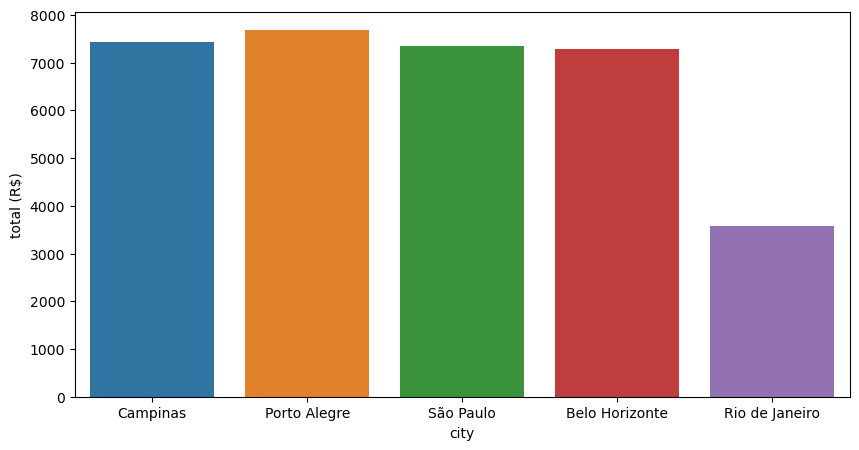

In [84]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond1l,ci=None)
plt.show()

From the above graph with the condition we found out that **Rio de Janeiro** are suitable City but the best fit for a big Family.

**Condition2: no pets, bath greater than 3, parking space 3,not furnished**.

In [89]:
cond2l = brazil_df[(brazil_df['animal']=='not acept')&(brazil_df['bathroom']==3)&(brazil_df['parking spaces']==3)&(brazil_df['furniture']=='not furnished')]

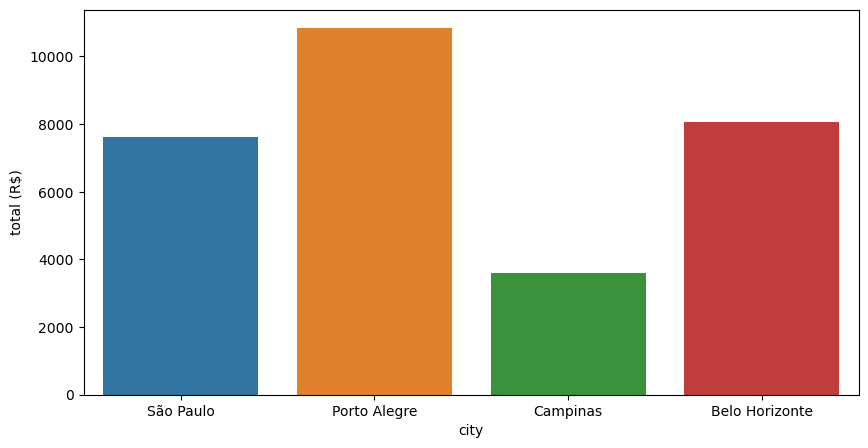

In [90]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond2l,ci=None)
plt.show()

From the above graph we can see that for no pets and Unfurnished city **Campinas**.

**Condition 3: pets, bath atleast 3, parking atleast 3, furnished,rooms atleast 4**.

In [95]:
cond3l = brazil_df[(brazil_df['animal']=='acept')&(brazil_df['bathroom']==3)&(brazil_df['parking spaces']>=3)&(brazil_df['furniture']=='furnished')&(brazil_df['rooms']==4)]

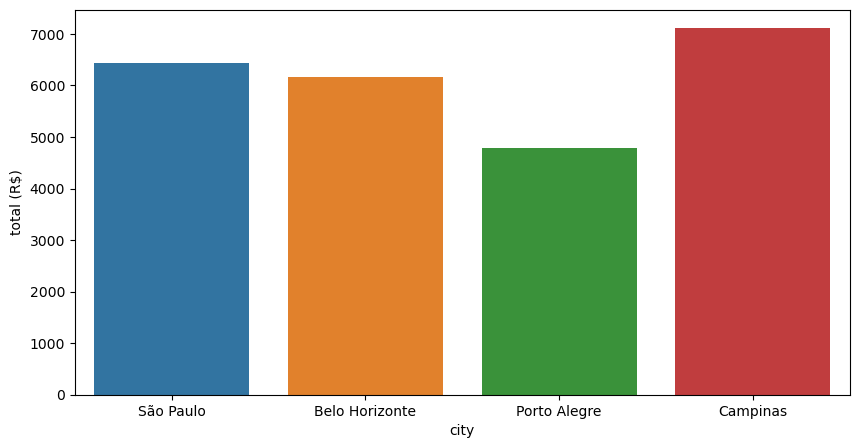

In [96]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='city',y='total (R$)',data=cond3l,ci=None)
plt.show()

From the above graph we can see that with the condition among the cities **Porto Alegre** seems to be the best city.

# Overall Conclusion

For **Bachelors** best City to live or relocate is **Belo Horizonte**.  

For **Mid-size Families** best city to live or relocate  is **Campinas**.  

For **Lagre Families** best City to live or relocate is **Porto Alegre** with the best fit.